In [19]:
import tensorflow as tf   # Import the TensorFlow library, which provides tools for machine learning and deep learning.
import pandas as pd  # Import the pandas library, used for data manipulation and analysis.

import matplotlib.pyplot as plt  # Import the matplotlib library for plotting and visualization.
# This line allows for the display of plots directly within the Jupyter notebook interface.
%matplotlib inline  
 
# Import Keras libraries
from tensorflow.keras.models import Sequential  # Import the Sequential model: a linear stack of layers from Keras module in TensorFlow.
from tensorflow.keras.layers import Dense  # Import the Dense layer: a fully connected neural network layer from Keras module in TensorFlow.
from tensorflow.keras.layers import Flatten  # Import the Flatten layer: used to convert input data into a 1D array from Keras module in TensorFlow.
from tensorflow.keras import layers # Import the whole layers library
from sklearn.metrics import confusion_matrix # Import the confusion matrix library
import numpy as np # Import numpy

In [28]:
def load_display_data(path, batch_size=32, shape=(224,224,3)):
    # Define the directory path
    directory_path = path
    
    # Define the batch size
    batch_size = batch_size
    
    # Define the image size using the 1st 2 elements of the shape parameter
    # We don't need the number of channels here, just the dimensions to use
    image_size = shape[:2]
    
    # Load the dataset
    dataset = tf.keras.preprocessing.image_dataset_from_directory(
        directory_path,
        batch_size=batch_size,
        image_size=image_size,
        validation_split=0.2,
        subset='training',
        seed=123,
        labels='inferred',
        label_mode='int'
    )
    
    # Get the class names
    class_names = dataset.class_names
    
    # Display 3 images from each of the 2 categories
    for i in range(2):
        plt.figure(figsize=(10, 10))
        for images, labels in dataset.take(1):
            images = images.numpy()
            labels = labels.numpy()
            for j in range(3):
                ax = plt.subplot(3, 3, j + 1)
                plt.imshow(images[labels == i][j].astype("uint8"))
                plt.title(class_names[i])
                plt.axis("off")
        plt.show()
    return dataset

In [52]:
def make_model(activation='relu', shape=(80,80,3), classes=2):
    '''A function to set up a model. 
          Takes in an activation function, shape for the input images, and number of classes.'''
    # Define the input shape
    input_shape = shape
    
    # Define the number of classes
    num_classes = classes
    
    # Define the model
    model = tf.keras.Sequential([
        layers.Conv2D(32, (3, 3), activation=activation, input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation=activation),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation=activation),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation=activation),
        layers.Dense(num_classes)
    ])

    return model

In [47]:
def compile_train_model(dataset, model,
                        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                        optimizer='adam'):


    # Compile the model
    model.compile(optimizer=optimizer,
                  loss=loss,
                  metrics=['accuracy'])
    # Train the model
    history = model.fit(dataset, epochs=10, validation_data=dataset, validation_split=0.2)
    return model, history

In [37]:
def evaluate_model(dataset, model, history):

    # Evaluate the model
    loss, accuracy = model.evaluate(dataset)
    print(f'Test loss: {loss}')
    print(f'Test accuracy: {accuracy}')


    # Plot the training and validation loss over time
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
    # Plot the training and validation accuracy over time
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy over Time')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    # Make predictions on the test set
    y_pred = np.argmax(model.predict(dataset), axis=-1)
    
    # Get the true labels
    y_true = np.concatenate([y for x, y in dataset], axis=0)
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    # Plot the confusion matrix
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks([0, 1], class_names)
    plt.yticks([0, 1], class_names)
    plt.colorbar()
    for i in range(num_classes):
        for j in range(num_classes):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
    plt.show()

In [51]:
def the_whole_shabang(path):
    
    load_display_data(path)
    model = make_model()
    model, history = compile_train_model(dataset, model)
    evaluate_model(dataset, model, history)

SyntaxError: expected ':' (2539104954.py, line 1)

In [53]:
path = 'data/ships/shipsnet/' # Path to the data.
                              # Only change this if you change the dataset or where it is located

# Hyperparameters
shape = (80,80,3)  # Dimensions to use for the images...the raw data are 80x80
                   #  color images, but you could down-sample them
                   #  or convert them to black and white if you wanted
batch_size = 32  # What batch size to use
classes = 2 # We have 2 classes in our example: ship and no_ship. 
            # Only change this if you change the dataset




Epoch 1/10
100/100 [==============================] - 11s 92ms/step - loss: 14.6982 - accuracy: 0.8750 - val_loss: 0.2268 - val_accuracy: 0.9281
Epoch 2/10
100/100 [==============================] - 9s 91ms/step - loss: 0.2066 - accuracy: 0.9259 - val_loss: 0.1729 - val_accuracy: 0.9316
Epoch 3/10
100/100 [==============================] - 9s 92ms/step - loss: 0.2690 - accuracy: 0.9128 - val_loss: 0.2444 - val_accuracy: 0.9137
Epoch 4/10
100/100 [==============================] - 9s 92ms/step - loss: 0.1991 - accuracy: 0.9303 - val_loss: 0.1782 - val_accuracy: 0.9347
Epoch 5/10
100/100 [==============================] - 9s 91ms/step - loss: 0.1767 - accuracy: 0.9344 - val_loss: 0.1445 - val_accuracy: 0.9447
Epoch 6/10
100/100 [==============================] - 9s 91ms/step - loss: 0.1768 - accuracy: 0.9306 - val_loss: 0.1490 - val_accuracy: 0.9478
Epoch 7/10
100/100 [==============================] - 9s 91ms/step - loss: 0.1504 - accuracy: 0.9431 - val_loss: 0.1105 - val_accuracy: 0.95

100/100 [==============================] - 5s 43ms/step - loss: 0.1224 - accuracy: 0.9538
Test loss: 0.12240863591432571
Test accuracy: 0.9537500143051147


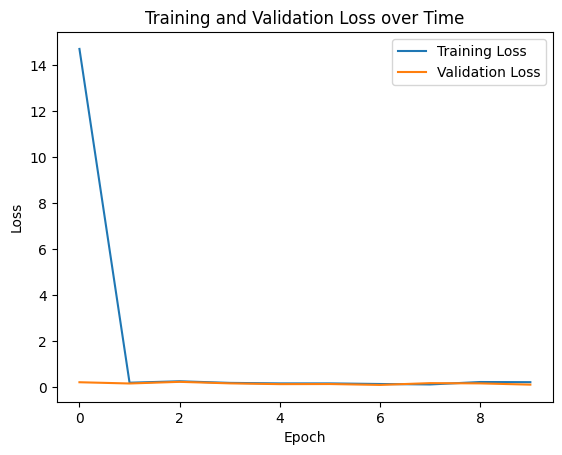

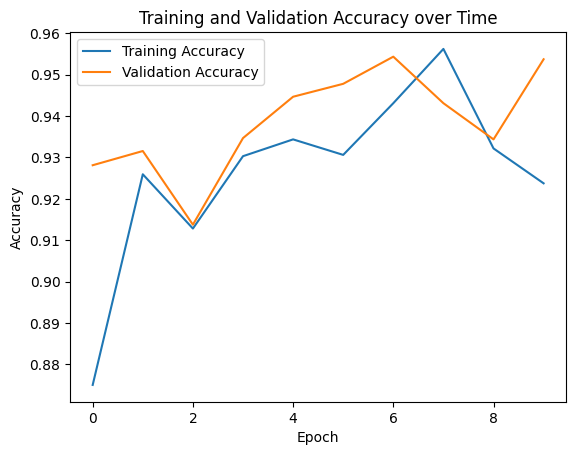

100/100 [==============================] - 4s 41ms/step


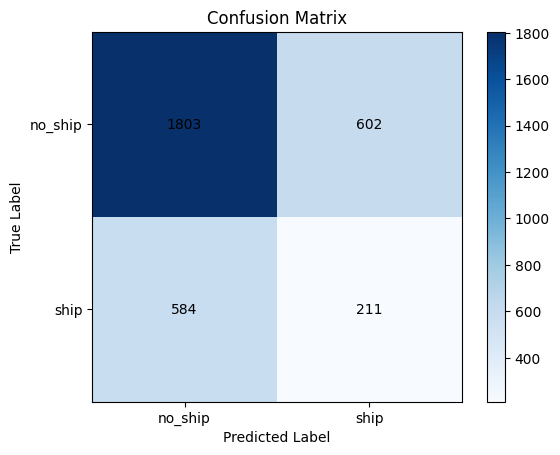

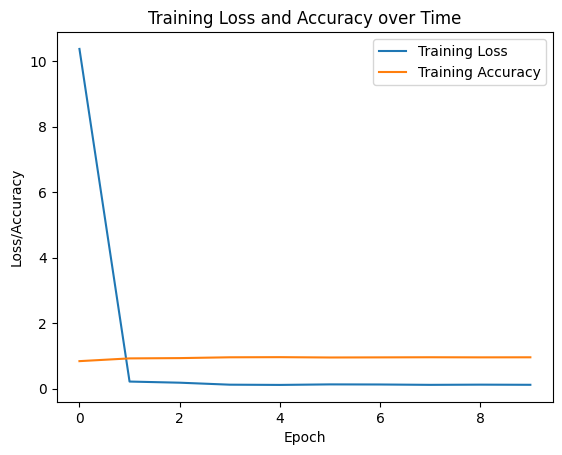

100/100 [==============================] - 5s 42ms/step


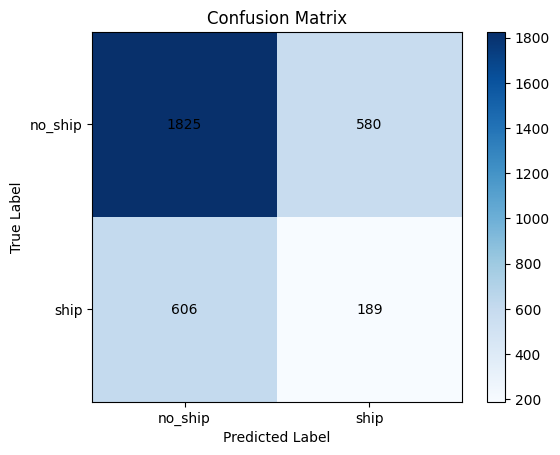

In [22]:
# Plot the training loss and accuracy over time
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.title('Training Loss and Accuracy over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()

# Make predictions on the test set
y_pred = np.argmax(model.predict(dataset), axis=-1)

# Get the true labels
y_true = np.concatenate([y for x, y in dataset], axis=0)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], class_names)
plt.yticks([0, 1], class_names)
plt.colorbar()
for i in range(num_classes):
    for j in range(num_classes):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')
plt.show()

KeyError: 'val_loss'

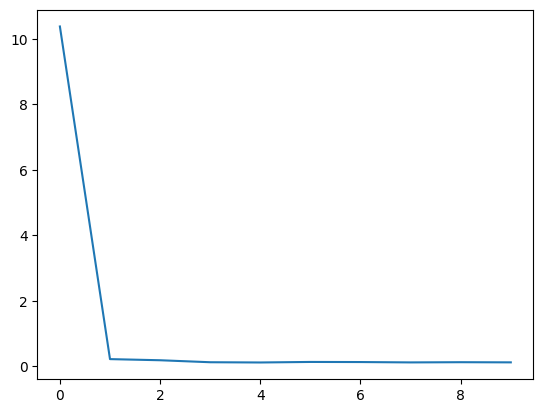

In [27]:
# Plot the training and validation loss over time
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss over Time')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy over time
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Time')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])
